In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
#Import eQTL 95 and FPKM files for required cancer type

FPKM_file = '/Users/jake/OneDrive - University of Glasgow/Project/COAD/GeneExpression_MAF/COAD_FPKM_protein_all.csv'
FPKM_protein = pd.read_csv(FPKM_file,sep='\t',header=[0,1],index_col=[0])


#Add path to eQTL files
path = r'/Users/jake/OneDrive - University of Glasgow/Project/COAD/eQTL/eQTL_95'

all_files = glob.glob(path + "/*.csv")

#For loop to read in eQTL files        
for filename in all_files:
    
    if 'cis_eQTL_95_ensembl' in filename:
        cis_eQTL_95 = pd.read_csv(filename,sep='\t',index_col=0)
    elif 'trans_eQTL_95_ensembl' in filename:
        trans_eQTL_95 = pd.read_csv(filename, sep='\t',index_col=0)
   

In [3]:
#Reset index
cis_eQTL_95.reset_index(drop=True)
trans_eQTL_95.reset_index(drop=True)

,Gene_symbol,Entrez_ID,Value_count,ensembl_gene_id,chromosome_name
0,CCDC74B,91409,384,ENSG00000152076,2.0
1,INTS4L1,285905,147,ENSG00000164669,7.0
2,C14orf167,55449,92,ENSG00000215256,14.0
3,ZNF90,7643,60,ENSG00000213988,19.0
4,LOC647121,647121,53,ENSG00000231752,1.0
5,NEUROD4,58158,45,ENSG00000123307,12.0
6,PLEK2,26499,27,ENSG00000100558,14.0
7,C21orf56,84221,21,ENSG00000160284,21.0
8,PIK3R4,30849,20,ENSG00000196455,3.0
9,CNOT7,29883,20,ENSG00000198791,8.0


In [4]:
FPKM_protein.head()

Gene_symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
Gene_ensembl_id,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000184389,ENSG00000128274,ENSG00000118017,ENSG00000094914,ENSG00000081760,ENSG00000114771,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,0.052551,2.477200,57.378073,0.021620,0.0,5.347004,0.000000,10.124001,3.888190,0.031552,...,8.337702,3.266961,11.951200,0.844530,2.250194,4.091899,0.011212,3.216321,87.952703,2.923495
TCGA-CA-6719-01A-11R-1839-07,0.005613,1.927244,74.944713,0.012317,0.0,4.271353,0.025395,11.569886,1.872340,1.159435,...,10.875540,6.107697,11.915234,1.711313,4.772996,4.795855,0.009581,5.434010,72.500361,5.158080
TCGA-NH-A50V-01A-11R-A28H-07,0.035237,0.550182,51.276491,0.024852,0.0,5.097944,0.056933,10.462945,3.612377,0.193436,...,7.953033,1.813204,14.288954,1.255144,4.156986,5.492997,0.038664,3.399480,57.827137,3.430372
TCGA-AA-A01C-01A-01R-A00A-07,0.049092,1.914795,45.653386,0.013464,0.0,5.011742,0.000000,15.683433,3.708620,0.117902,...,7.460225,3.650127,22.783866,1.123639,2.886182,3.341388,0.000000,2.662764,116.008374,5.140081
TCGA-AA-A02F-01A-01R-A089-07,0.011685,1.145542,28.787736,0.006410,0.0,2.099586,0.000000,15.396349,2.902797,0.028064,...,7.259496,11.352859,21.240253,1.650287,4.630294,6.636417,0.000000,5.230433,68.590155,2.939338


In [5]:
#Check for number cis_eQTL genes not present in FPKM_protein 

display(len(list(set(cis_eQTL_95['ensembl_gene_id']) - set(FPKM_protein.columns.levels[1]))))
display (len(list(set(cis_eQTL_95['Gene_symbol']) - set(FPKM_protein.columns.levels[0]) )))

25

54

In [6]:
#Create list of cis_eQTL genes / columns to keep in FPKM .. use Ensembl ID
#ADD 'Cancer' TO LIST since = target variable

cols_to_keep_cis = list(cis_eQTL_95['ensembl_gene_id'])
cols_to_keep_cis.append('Cancer')

In [7]:
#Filter FPKM for the cis_eQTL_95 genes

FPKM_cis_95 = FPKM_protein.loc(axis=1)[:, cols_to_keep_cis]

In [8]:
FPKM_cis_95

Gene_symbol,FABP2,ZNF117,XKR9,NUDT13,C2orf74,METTL18,WFDC3,CPNE1,N6AMT1,ULK4,...,DHFR,SLC13A4,ZNF239,RGS6,PCCB,ZNF585A,ZNF79,STMP1,RAB33B,Cancer
Gene_ensembl_id,ENSG00000145384,ENSG00000152926,ENSG00000221947,ENSG00000166321,ENSG00000237651,ENSG00000171806,ENSG00000124116,ENSG00000214078,ENSG00000156239,ENSG00000168038,...,ENSG00000228716,ENSG00000164707,ENSG00000196793,ENSG00000182732,ENSG00000114054,ENSG00000196967,ENSG00000196152,ENSG00000243317,ENSG00000172007,Cancer
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,3.037137,0.196912,0.134775,0.772429,0.000000,2.234588,1.247353,107.213731,2.325869,0.495977,...,1.945705,0.124761,1.824938,0.029445,5.974278,0.313096,1.463202,11.145080,2.355141,1
TCGA-CA-6719-01A-11R-1839-07,0.099824,1.756354,0.023035,0.695770,0.341397,4.631485,1.458658,80.408275,1.687151,0.758817,...,2.045258,0.067337,4.956423,0.145942,8.007415,0.733702,2.608254,11.654345,1.838190,1
TCGA-NH-A50V-01A-11R-A28H-07,0.048827,3.480090,1.626679,1.055877,0.199660,3.846554,1.718902,61.832780,3.672512,1.192345,...,2.881462,0.150959,4.854547,0.243694,7.036026,0.845391,1.699452,8.839348,2.831534,1
TCGA-AA-A01C-01A-01R-A00A-07,2.460243,0.846169,0.050361,1.248144,0.194714,1.931712,2.207834,115.282003,1.212708,0.911712,...,2.854681,0.049073,2.469037,0.044010,5.248116,0.356468,2.306620,14.420458,0.586697,1
TCGA-AA-A02F-01A-01R-A089-07,0.302252,1.668233,0.011988,0.482781,0.000000,6.110972,1.265169,67.596046,1.337464,0.910752,...,4.278732,0.052564,5.149422,0.010476,4.530721,0.722315,1.504792,11.204312,1.508238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A6-2682-11A-01R-A32Z-07,15.418344,0.596458,0.522916,1.342880,0.449282,2.667528,0.230884,20.136296,2.036059,0.462847,...,3.965134,0.071515,0.721056,0.114243,8.197457,0.459543,2.388808,10.089674,1.481993,0
TCGA-AA-3522-11A-01R-A32Z-07,14.217190,0.575132,0.135610,1.342037,0.194190,4.381274,0.189608,18.652374,2.110484,0.395752,...,4.103690,0.126635,0.703542,0.149782,9.116541,0.600264,2.000086,9.840412,1.878232,0


In [9]:
### Repeat for trans_eQTL

In [10]:
#Check number of cis_eQTL genes not present in FPKM_protein 

display(len(list(set(trans_eQTL_95['ensembl_gene_id']) - set(FPKM_protein.columns.levels[1]))))
display (len(list(set(trans_eQTL_95['Gene_symbol']) - set(FPKM_protein.columns.levels[0]) )))

4

5

In [9]:
#Create list of trans_eQTL genes / columns to keep in FPKM ... use Ensembl ID
#ADD 'Cancer' TO LIST since = target variable

cols_to_keep_trans = list(trans_eQTL_95['ensembl_gene_id'])
cols_to_keep_trans.append('Cancer')

In [10]:
#Filter FPKM for the cis_eQTL_95 genes

FPKM_trans_95 = FPKM_protein.loc(axis=1)[:, cols_to_keep_trans]

In [11]:
FPKM_trans_95

Gene_symbol,CCDC74B,ZNF90,NEUROD4,PLEK2,SPATC1L,PIK3R4,CNOT7,Cancer
Gene_ensembl_id,ENSG00000152076,ENSG00000213988,ENSG00000123307,ENSG00000100558,ENSG00000160284,ENSG00000196455,ENSG00000198791,Cancer
Sample_ID,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,0.129023,0.230418,0.0,35.031642,9.767935,5.736777,3.395454,1
TCGA-CA-6719-01A-11R-1839-07,0.160375,0.993484,0.0,71.306724,3.200127,8.541623,3.109184,1
TCGA-NH-A50V-01A-11R-A28H-07,0.723573,0.321045,0.0,20.706595,0.112368,5.922912,3.805363,1
TCGA-AA-A01C-01A-01R-A00A-07,0.087658,0.508774,0.0,66.187442,5.142008,4.810433,5.319527,1
TCGA-AA-A02F-01A-01R-A089-07,0.125192,1.481191,0.0,62.872482,3.270566,5.607596,10.240893,1
...,...,...,...,...,...,...,...,...
TCGA-A6-2682-11A-01R-A32Z-07,0.079840,0.563208,0.0,36.226606,3.692993,5.714168,5.395093,0
TCGA-AA-3522-11A-01R-A32Z-07,0.042618,0.459593,0.0,20.509428,2.257240,5.959477,5.594680,0


In [14]:
#Write the filtered FPKM dataframes to csv

FPKM_cis_95.to_csv(path.split('/')[5]+'_FPKM_cis_eQTL_95.csv',sep='\t')
FPKM_trans_95.to_csv(path.split('/')[5]+'_FPKM_trans_eQTL_95.csv',sep='\t')

In [12]:
#Create boolean for tumour and normal samples

cancer_value_cis = FPKM_cis_95[("Cancer", "Cancer")] == 1
normal_value_cis = FPKM_cis_95[("Cancer", "Cancer")] == 0

cancer_value_trans = FPKM_trans_95[("Cancer", "Cancer")] == 1
normal_value_trans = FPKM_trans_95[("Cancer", "Cancer")] == 0

#Input corresponding boolean to create new cancer and normal dataframes

FPKM_cis_cancer = FPKM_cis_95[cancer_value_cis]
FPKM_cis_normal = FPKM_cis_95[normal_value_cis]

FPKM_trans_cancer = FPKM_trans_95[cancer_value_trans]
FPKM_trans_normal = FPKM_trans_95[normal_value_trans]

#Drop the cancer column from the cancer and normal FPKM tables for plotting

FPKM_cis_normal.drop('Cancer',axis=1,level=0,inplace=True)
FPKM_cis_cancer.drop('Cancer',axis=1,level=0,inplace=True)

FPKM_trans_cancer.drop('Cancer',axis=1,level=0,inplace=True)
FPKM_trans_normal.drop('Cancer',axis=1,level=0,inplace=True)

In [ ]:
### Mean difference plots ### 

#Starting with cis eQTLs

In [51]:
#Get mean difference between cancer and normal cis FPKM - this series will be used for plot

mean_dif_cis = (FPKM_cis_cancer.mean() - FPKM_cis_normal.mean())
mean_dif_cis

pandas.core.series.Series

In [57]:
#Now create dataframe with absolute difference - this will be used for plot labelling

mean_dif_cis_abs_df = abs(FPKM_cis_cancer.mean() - FPKM_cis_normal.mean()).to_frame('Absolute_Mean_FPKM_difference_cancer_vs_normal')

#Reset the index to only include Gene_symbol
mean_dif_cis_abs_df.reset_index(level='Gene_ensembl_id',inplace=True)

In [59]:
#Get list of top genes with highest mean_FPKM_differnece via index ( = Gene_symbol symbol) 

top_genes_list_cis = mean_dif_cis_abs_df.sort_values(by='Absolute_Mean_FPKM_difference_cancer_vs_normal',ascending=False).head(10).index

#Now get index positions of these genes, using enumerate, for xtick positions

xticks_cis = [i for i,x in enumerate (mean_dif_cis_abs_df.index) if x in top_genes_list_cis]

In [61]:
#Create a dataframe only containing the genes with greatest FPKM mean difference
#the index of these will be used as xtick labels

xticks_cis_df = mean_dif_cis_abs_df[mean_dif_cis_abs_df.index.isin(top_genes_list_cis)]

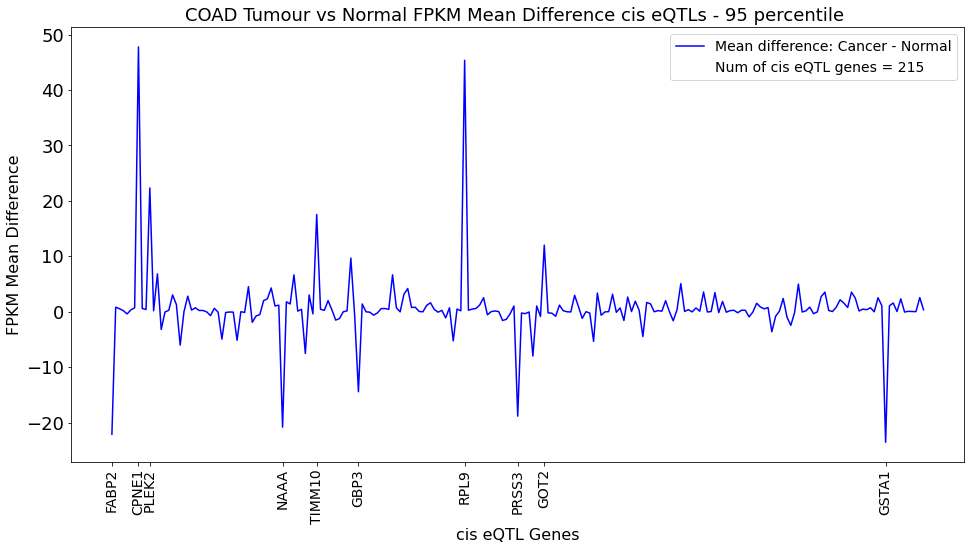

In [86]:
#Plot for mean FPKM difference between tumour and normal samples for cis eQTLs

ax = mean_dif_cis.plot(label='Mean difference: Cancer - Normal',color='blue',figsize=(16,8))

ax.plot([], [], ' ',label= 'Num of cis eQTL = ' + str(len(mean_dif_cis)))

ax.legend(['Mean difference: Cancer - Normal','Num of cis eQTL genes = ' + str(len(mean_dif_cis))],fontsize=14)
ax.set_xlabel('cis eQTL Genes',fontsize=16)
ax.set_xticks(xticks_cis)
ax.set_xticklabels(xticks_cis_df.index,fontsize=14,rotation=90)
ax.set_ylabel('FPKM Mean Difference',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Difference cis eQTLs - 95 percentile ',fontsize=18)

ax.figure.savefig(path.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Difference_cis_eQTL_95_percentile.png')

In [64]:
#Repeat process for trans eQTLs

In [65]:
#Get mean difference between cancer and normal trans FPKM - this series will be used for plot

mean_dif_trans = (FPKM_trans_cancer.mean() - FPKM_trans_normal.mean())
mean_dif_trans

Gene_symbol  Gene_ensembl_id
CCDC74B      ENSG00000152076     0.072490
ZNF90        ENSG00000213988    -0.007858
NEUROD4      ENSG00000123307     0.011846
PLEK2        ENSG00000100558    22.336850
SPATC1L      ENSG00000160284     1.257596
PIK3R4       ENSG00000196455     0.643761
CNOT7        ENSG00000198791     0.907775
dtype: float64

In [66]:
#Now create dataframe with absolute difference - this will be used for plot labelling

mean_dif_trans_abs_df = abs(FPKM_trans_cancer.mean() - FPKM_trans_normal.mean()).to_frame('Absolute_Mean_FPKM_difference_cancer_vs_normal')

#Reset the index to only include Gene_symbol
mean_dif_trans_abs_df.reset_index(level='Gene_ensembl_id',inplace=True)

In [74]:
#Get list of top genes with highest mean_FPKM_differnece via index ( = Gene_symbol symbol) 

top_genes_list_trans = mean_dif_trans_abs_df.sort_values(by='Absolute_Mean_FPKM_difference_cancer_vs_normal',ascending=False).head(10).index

#Now get index positions of these genes, using enumerate, for xtick positions

xticks_trans = [i for i,x in enumerate (mean_dif_trans_abs_df.index) if x in top_genes_list_trans]

In [75]:
#Create a dataframe only containing the genes with greatest FPKM mean difference
#the index of these will be used as xtick labels

xticks_trans_df = mean_dif_trans_abs_df[mean_dif_trans_abs_df.index.isin(top_genes_list_trans)]

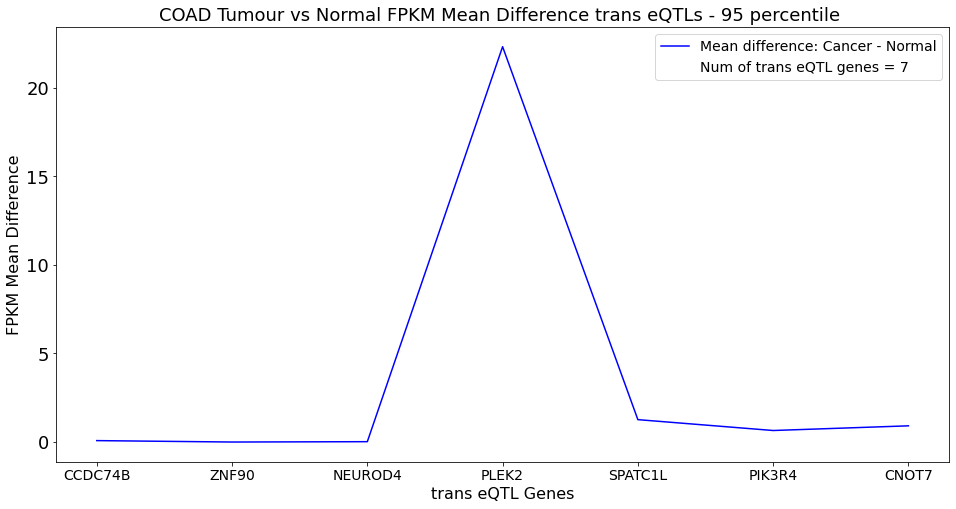

In [87]:
#Plot for mean FPKM difference between tumour and normal samples for trans eQTLs

ax = mean_dif_trans.plot(label='Mean difference: Cancer - Normal',color='blue',figsize=(16,8))

ax.plot([], [], ' ',label= 'Num of trans eQTL = ' + str(len(mean_dif_trans)))

ax.legend(['Mean difference: Cancer - Normal','Num of trans eQTL genes = ' + str(len(mean_dif_trans))],fontsize=14)
ax.set_xlabel('trans eQTL Genes',fontsize=16)
ax.set_xticks(xticks_trans)
ax.set_xticklabels(xticks_trans_df.index,fontsize=14)
ax.set_ylabel('FPKM Mean Difference',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Difference trans eQTLs - 95 percentile ',fontsize=18)

ax.figure.savefig(path.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Difference_trans_eQTL_95_percentile.png')

In [ ]:
#Now create plots comparing tumour to normal FPKM mean values on same plot 

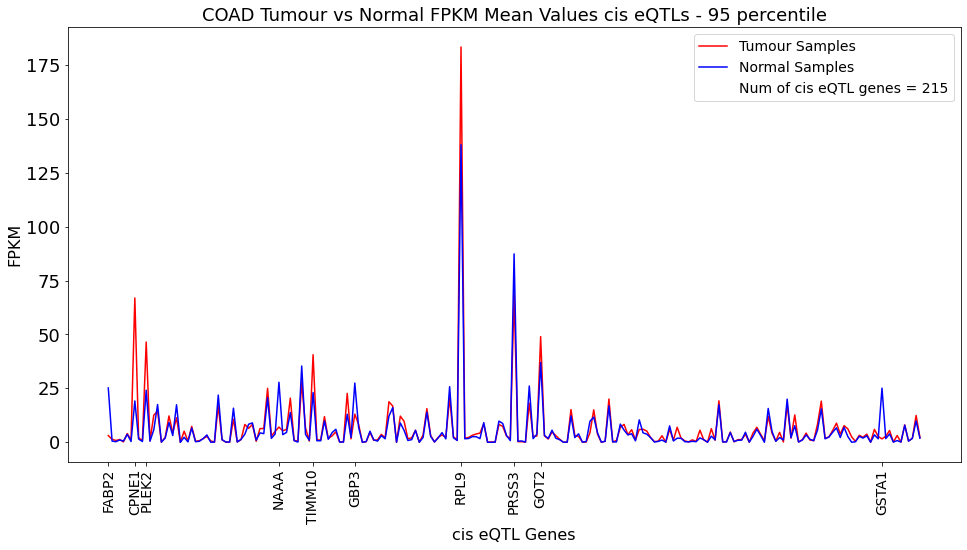

In [84]:
#cis eQTL plot

ax = FPKM_cis_cancer.mean().plot(label='Tumour',color = 'red',figsize=(16,8))
FPKM_cis_normal.mean().plot(ax=ax,label='Normal',color = 'blue')
ax.plot([], [], ' ',label= 'Num of cis eQTL genes = ' + str(len(FPKM_cis_cancer.columns)))

ax.legend(['Tumour Samples','Normal Samples','Num of cis eQTL genes = ' + str(len(FPKM_cis_cancer.columns))],fontsize=14)
ax.set_xlabel('cis eQTL Genes',fontsize=16)
ax.set_xticks(xticks_cis)
ax.set_xticklabels(xticks_cis_df.index,fontsize=14,rotation = 90)
ax.set_ylabel('FPKM',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Values cis eQTLs - 95 percentile',fontsize=18)

ax.figure.savefig(path.split('/')[5] + '_Tumour_vs_Normal_FPKM_Distrbution_cis_eQTL_95_percentile.png')

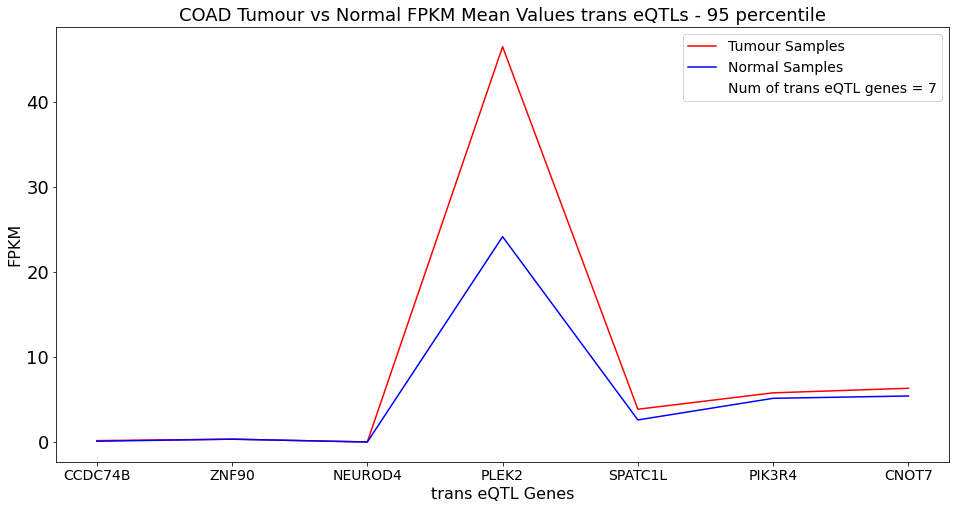

In [88]:
#trans eQTL plot

ax = FPKM_trans_cancer.mean().plot(label='Tumour',color = 'red',figsize=(16,8))
FPKM_trans_normal.mean().plot(ax=ax,label='Normal',color = 'blue')
ax.plot([], [], ' ',label= 'Num of trans eQTL genes = ' + str(len(FPKM_trans_cancer.columns)))

ax.legend(['Tumour Samples','Normal Samples','Num of trans eQTL genes = ' + str(len(FPKM_trans_cancer.columns))],fontsize=14)
ax.set_xlabel('trans eQTL Genes',fontsize=16)
ax.set_xticks(xticks_trans)
ax.set_xticklabels(xticks_trans_df.index,fontsize=14)
ax.set_ylabel('FPKM',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Values trans eQTLs - 95 percentile',fontsize=18)

ax.figure.savefig(path.split('/')[5] + '_Tumour_vs_Normal_FPKM_Distrbution_trans_eQTL_95_percentile.png')

Text(0.5, 1.0, 'COAD Tumour vs Normal Absolute FPKM Mean Difference cis eQTLs - 95 percentile ')

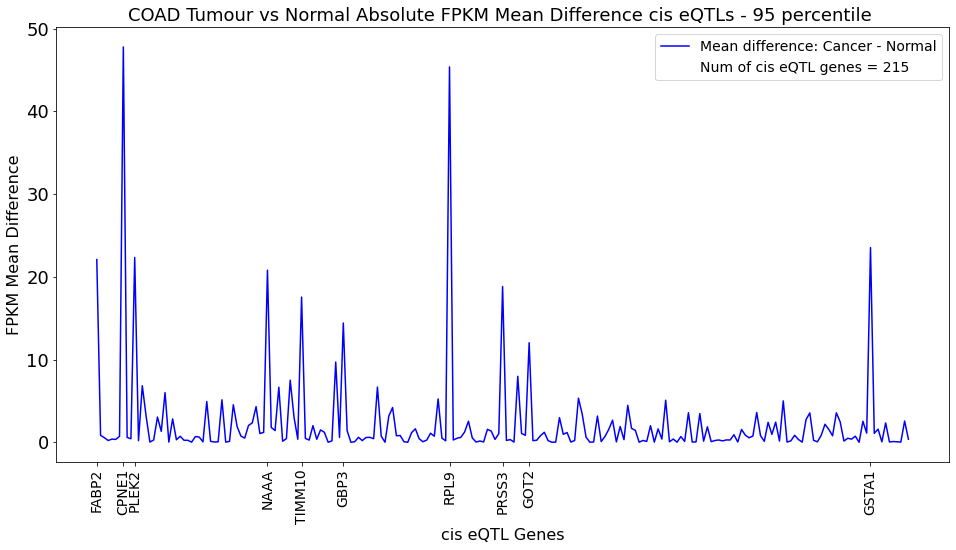

In [90]:
#Plot for absolute mean FPKM difference between tumour and normal samples for cis eQTLs

ax = abs(mean_dif_cis).plot(label='Mean difference: Cancer - Normal',color='blue',figsize=(16,8))

ax.plot([], [], ' ',label= 'Num of cis eQTL = ' + str(len(mean_dif_cis)))

ax.legend(['Mean difference: Cancer - Normal','Num of cis eQTL genes = ' + str(len(mean_dif_cis))],fontsize=14)
ax.set_xlabel('cis eQTL Genes',fontsize=16)
ax.set_xticks(xticks_cis)
ax.set_xticklabels(xticks_cis_df.index,fontsize=14,rotation=90)
ax.set_ylabel('FPKM Mean Difference',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal Absolute FPKM Mean Difference cis eQTLs - 95 percentile ',fontsize=18)

#ax.figure.savefig(path.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Difference_cis_eQTL_95_percentile.png')